# Creating a Master Bias from FITS Files

This notebook combines multiple bias images to create a **master bias** using median stacking.

Steps:
1. Load the bias `.fits` files.
2. Check their dimensions and consistency.
3. Stack the images.
4. Compute the pixel-by-pixel median.
5. Save the result as `master_bias.fits`.
6. Display a visualization and statistics.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from pathlib import Path

# Folder containing the bias files
bias_dir = Path('/Volumes/Astro/ohp/CANAGUIER_LOUSTALET_SAPHORES/20250923/Bias')  # à adapter

# List all .fits files in the bias directory
bias_files = sorted(bias_dir.glob('Bias*.fits'))
print(bias_files)
print(f"Files found: {len(bias_files)}")
if len(bias_files) == 0:
    raise FileNotFoundError("No files found")

[PosixPath('/Volumes/Astro/ohp/CANAGUIER_LOUSTALET_SAPHORES/20250923/Bias/Bias-S001-R001-C001-B1.fits'), PosixPath('/Volumes/Astro/ohp/CANAGUIER_LOUSTALET_SAPHORES/20250923/Bias/Bias-S001-R001-C001-B1_dupe-1.fits'), PosixPath('/Volumes/Astro/ohp/CANAGUIER_LOUSTALET_SAPHORES/20250923/Bias/Bias-S001-R001-C002-B1.fits'), PosixPath('/Volumes/Astro/ohp/CANAGUIER_LOUSTALET_SAPHORES/20250923/Bias/Bias-S001-R001-C002-B1_dupe-1.fits'), PosixPath('/Volumes/Astro/ohp/CANAGUIER_LOUSTALET_SAPHORES/20250923/Bias/Bias-S001-R001-C003-B1.fits'), PosixPath('/Volumes/Astro/ohp/CANAGUIER_LOUSTALET_SAPHORES/20250923/Bias/Bias-S001-R001-C003-B1_dupe-1.fits'), PosixPath('/Volumes/Astro/ohp/CANAGUIER_LOUSTALET_SAPHORES/20250923/Bias/Bias-S001-R001-C004-B1.fits'), PosixPath('/Volumes/Astro/ohp/CANAGUIER_LOUSTALET_SAPHORES/20250923/Bias/Bias-S001-R001-C004-B1_dupe-1.fits'), PosixPath('/Volumes/Astro/ohp/CANAGUIER_LOUSTALET_SAPHORES/20250923/Bias/Bias-S001-R001-C005-B1.fits'), PosixPath('/Volumes/Astro/ohp/CANAG

In [13]:
# Images reading
bias_data = []
for file in bias_files:
    print(f"filename : {file}")
    with open(file, "rb") as f:
        head = f.read(2880)  # read first FITS header block
        print(head[:100])
    with fits.open(file) as hdul:
        data = hdul[0].data.astype(np.float32)
        bias_data.append(data)

bias_data = np.array(bias_data)
print(f"Dimensions : {bias_data.shape}")

filename : /Volumes/Astro/ohp/CANAGUIER_LOUSTALET_SAPHORES/20250923/Bias/Bias-S001-R001-C001-B1.fits
b'SIMPLE  =                    T                                                  BITPIX  =           '
filename : /Volumes/Astro/ohp/CANAGUIER_LOUSTALET_SAPHORES/20250923/Bias/Bias-S001-R001-C001-B1_dupe-1.fits
b'SIMPLE  =                    T                                                  BITPIX  =           '
filename : /Volumes/Astro/ohp/CANAGUIER_LOUSTALET_SAPHORES/20250923/Bias/Bias-S001-R001-C002-B1.fits
b'SIMPLE  =                    T                                                  BITPIX  =           '
filename : /Volumes/Astro/ohp/CANAGUIER_LOUSTALET_SAPHORES/20250923/Bias/Bias-S001-R001-C002-B1_dupe-1.fits
b'SIMPLE  =                    T                                                  BITPIX  =           '
filename : /Volumes/Astro/ohp/CANAGUIER_LOUSTALET_SAPHORES/20250923/Bias/Bias-S001-R001-C003-B1.fits
b'SIMPLE  =                    T                                 

In [14]:
# Calculate master bias
master_bias = np.median(bias_data, axis=0)
print(f"Dimensions {master_bias.shape}")

Dimensions (2048, 2048)


In [15]:
# Saving master bias
output_path = Path('master_bias.fits')
fits.writeto(output_path, master_bias.astype(np.float32), overwrite=True)
print(f"Saved master bias to {output_path.resolve()}")

Saved master bias to /Users/romain/Documents/VScode/OHP/master_bias.fits


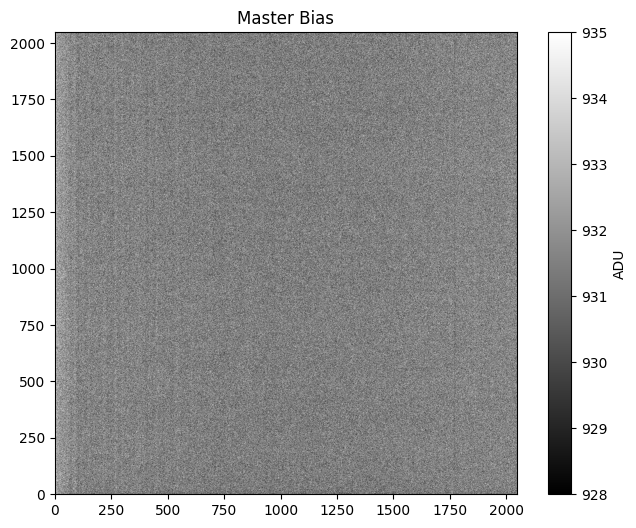

Mean : 931.56 ADU
Std : 2.08 ADU


In [16]:
# Display master bias
plt.figure(figsize=(8, 6))
plt.imshow(master_bias, cmap='gray', origin='lower', vmin=np.percentile(master_bias, 5), vmax=np.percentile(master_bias, 95))
plt.colorbar(label='ADU')
plt.title('Master Bias')
plt.show()

print(f"Mean : {np.mean(master_bias):.2f} ADU")
print(f"Std : {np.std(master_bias):.2f} ADU")